In [1]:
#Data Exploration

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("abp_accel.csv")

In [4]:
print(data.head())

                    timestamp    x    y    z
0  2015-06-12 13:30:00.161041  100  620  804
1  2015-06-12 13:30:00.260490   68  640  800
2  2015-06-12 13:30:00.359939   48  628  884
3  2015-06-12 13:30:00.459388   44  616  888
4  2015-06-12 13:30:00.558837   76  628  860


In [5]:
print(data.tail())

                           timestamp    x     y    z
14595848  2015-06-29 08:29:59.416163   76  1040 -128
14595849  2015-06-29 08:29:59.515527   68  1052 -140
14595850  2015-06-29 08:29:59.614891  112  1024 -132
14595851  2015-06-29 08:29:59.714255  104  1052 -152
14595852  2015-06-29 08:29:59.813619   84  1044 -132


In [6]:
data.describe()

,x,y,z
count,1.459585e+07,1.459585e+07,1.459585e+07
mean,4.719627e+01,8.962975e+02,1.418171e+02
std,3.446561e+02,2.013185e+02,3.371740e+02
min,-1.840000e+03,-1.828000e+03,-2.040000e+03
25%,-2.400000e+02,8.400000e+02,-3.600000e+01
50%,1.640000e+02,9.720000e+02,1.040000e+02
75%,3.200000e+02,1.016000e+03,2.840000e+02
max,1.792000e+03,1.904000e+03,2.040000e+03


In [7]:
print(data.dtypes)

timestamp    object
x             int64
y             int64
z             int64
dtype: object


In [8]:
print(type(data.timestamp))

<class 'pandas.core.series.Series'>


In [9]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [10]:
print(data.shape)

(14595853, 4)


In [11]:
from datetime import datetime

In [12]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [13]:
print(data.head())

                   timestamp    x    y    z
0 2015-06-12 13:30:00.161041  100  620  804
1 2015-06-12 13:30:00.260490   68  640  800
2 2015-06-12 13:30:00.359939   48  628  884
3 2015-06-12 13:30:00.459388   44  616  888
4 2015-06-12 13:30:00.558837   76  628  860


In [14]:
data[0:870000]

,timestamp,x,y,z
0,2015-06-12 13:30:00.161041,100,620,804
1,2015-06-12 13:30:00.260490,68,640,800
2,2015-06-12 13:30:00.359939,48,628,884
3,2015-06-12 13:30:00.459388,44,616,888
4,2015-06-12 13:30:00.558837,76,628,860
...,...,...,...,...
869995,2015-06-13 13:32:01.211933,536,788,440
869996,2015-06-13 13:32:01.311405,536,784,456
869997,2015-06-13 13:32:01.410877,532,788,452
869998,2015-06-13 13:32:01.510349,536,784,448


In [15]:
modified = data[0:870000]

In [16]:
import numpy as np
columns = modified[['x','y','z']]
for i in columns:
    Q1 = np.percentile(modified[i],25)
    Q3 = np.percentile(modified[i],75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
 
    l = []
    for j in modified[i]:
        if j < lower or j > upper:
            l.append(j)
 
    Percent = len(l)*100/len(modified[i])
    print("Percent =", "%.2f"%Percent,"%")

Percent = 0.37 %
Percent = 10.96 %
Percent = 4.52 %


In [17]:
#No need to remove too many outliers since it will alter the dataset

In [18]:
print(modified.shape)

(870000, 4)


In [19]:
modified = modified.resample('5s', on='timestamp').agg({'x':'mean', 'y':'mean','z':'mean'})

In [20]:
print(modified.shape)

(17305, 3)


In [21]:
print(type(modified))

<class 'pandas.core.frame.DataFrame'>


In [22]:
print(modified.head(5))

                              x           y           z
timestamp                                              
2015-06-12 13:30:00   87.673469  605.142857  848.326531
2015-06-12 13:30:05 -636.480000  420.640000  664.160000
2015-06-12 13:30:10 -747.607843  375.137255  607.137255
2015-06-12 13:30:15 -791.920000  308.800000  590.480000
2015-06-12 13:30:20 -740.160000  432.400000  569.600000


In [23]:
print(modified.tail())

                              x           y           z
timestamp                                              
2015-06-13 13:31:40  526.980392  803.215686  428.078431
2015-06-13 13:31:45  538.800000  794.400000  426.400000
2015-06-13 13:31:50  546.160000  784.960000  439.440000
2015-06-13 13:31:55  550.000000  777.280000  448.400000
2015-06-13 13:32:00  537.647059  787.294118  445.882353


In [24]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Motion')

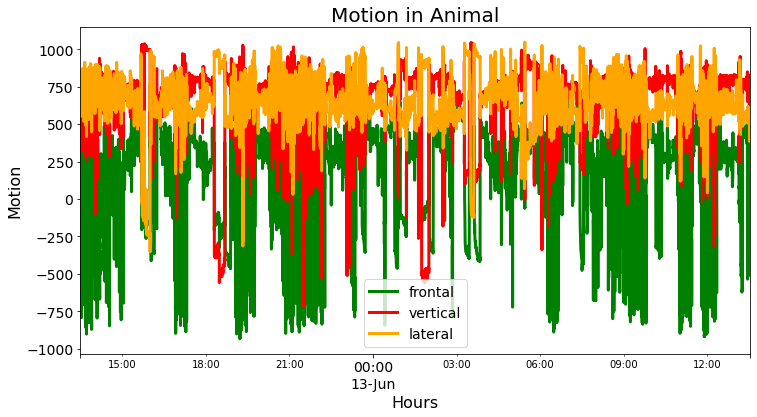

In [25]:
colors = ['green', 'red', 'orange']
# Line plot 
modified.plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
#plt.set_xticks(np.arange(0, 72, 1))
plt.yticks(fontsize=14)
plt.legend(labels =['frontal', 'vertical', 'lateral'], fontsize=14)
plt.title('Motion in Animal', fontsize=20)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Motion', fontsize=16)

In [26]:
a = pd.isnull(modified["x"])
b = a.sum()
print(b)

0


In [27]:
print(modified.shape)

(17305, 3)


In [28]:
a = pd.isnull(modified["y"])
b = a.sum()
print(b)

0


In [29]:
a = pd.isnull(modified["z"])
b = a.sum()
print(b)

0


In [30]:
# Statistical Features on raw x, y and z in time domain
from scipy import stats
# mean
modified['x_mean'] = modified['x'].mean(axis=0)
modified['y_mean'] = modified['y'].mean(axis=0)
modified['z_mean'] = modified['z'].mean(axis=0)


# std dev
modified['x_std'] = modified['x'].std(axis=0)
modified['y_std'] = modified['y'].std(axis=0)
modified['z_std'] = modified['z'].std(axis=0)



# min
modified['x_min'] = modified['x'].min(axis=0)
modified['y_min'] = modified['y'].min(axis=0)
modified['z_min'] = modified['z'].min(axis=0)


# max
modified['x_max'] = modified['x'].max(axis=0)
modified['y_max'] = modified['y'].max(axis=0)
modified['z_max'] = modified['z'].max(axis=0)




# median
modified['x_median'] = modified['x'].median(axis=0)
modified['y_median'] = modified['y'].median(axis=0)
modified['z_median'] = modified['z'].median(axis=0)


In [31]:
# max-min diff
modified['x_maxmin_diff'] = modified['x_max'] - modified['x_min']
modified['y_maxmin_diff'] = modified['y_max'] - modified['y_min']
modified['z_maxmin_diff'] = modified['z_max'] - modified['z_min']

In [32]:
# avg absolute diff
modified['x_aad'] = np.absolute(modified['x']-modified['x_mean'])
modified['y_aad'] = np.absolute(modified['y']-modified['y_mean'])
modified['z_aad'] = np.absolute(modified['z']-modified['z_mean'])

In [33]:
# median abs dev 
modified['x_mad'] = np.absolute(modified['x'] - modified['x_median'])
modified['y_mad'] = np.absolute(modified['y'] - modified['y_median'])
modified['z_mad'] = np.absolute(modified['z'] - modified['z_median'])

In [34]:
# interquartile range
modified['x_IQR'] = np.percentile(modified['x'], 75) - np.percentile(modified['x'], 25)

modified['y_IQR'] = np.percentile(modified['y'], 75) - np.percentile(modified['y'], 25)
modified['z_IQR'] = np.percentile(modified['z'], 75) - np.percentile(modified['z'], 25)

In [35]:
#distance
modified['x_distance'] = np.absolute(modified['x']-modified['x_IQR'])
modified['y_distance'] = np.absolute(modified['y']-modified['y_IQR'])
modified['z_distance'] = np.absolute(modified['z']-modified['z_IQR'])

In [36]:
# skewness
modified['x_skewness'] = stats.skew(modified['x'])
modified['y_skewness'] = stats.skew(modified['y'])
modified['z_skewness'] = stats.skew(modified['z'])

In [37]:
# kurtosis
modified['x_kurtosis'] = stats.kurtosis(modified['x'])
modified['y_kurtosis'] = stats.kurtosis(modified['y'])
modified['z_kurtosis'] = stats.kurtosis(modified['z'])

In [38]:
# avg resultant
modified['avg_result_accl'] = np.mean((modified['x']**2 + modified['y']**2 + modified['z']**2)**0.5)
modified['result_accl'] = (modified['x']**2 + modified['y']**2 + modified['z']**2)**0.5
modified['diff_result_accl'] = np.absolute(modified['avg_result_accl']-modified['result_accl'])
modified['sum'] = np.absolute(modified['x']) + np.absolute(modified['y']) + np.absolute(modified['z'])

In [39]:
modified

,x,y,z,x_mean,y_mean,z_mean,x_std,y_std,z_std,x_min,...,x_skewness,y_skewness,z_skewness,x_kurtosis,y_kurtosis,z_kurtosis,avg_result_accl,result_accl,diff_result_accl,sum
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-06-12 13:30:00,87.673469,605.142857,848.326531,111.64119,654.088356,661.158122,345.898806,265.078441,170.737623,-933.76,...,-0.85049,-2.672105,-1.74152,-0.193355,8.16839,7.720246,1046.971467,1045.725785,1.245682,1541.142857
2015-06-12 13:30:05,-636.480000,420.640000,664.160000,111.64119,654.088356,661.158122,345.898806,265.078441,170.737623,-933.76,...,-0.85049,-2.672105,-1.74152,-0.193355,8.16839,7.720246,1046.971467,1011.510408,35.461059,1721.280000
2015-06-12 13:30:10,-747.607843,375.137255,607.137255,111.64119,654.088356,661.158122,345.898806,265.078441,170.737623,-933.76,...,-0.85049,-2.672105,-1.74152,-0.193355,8.16839,7.720246,1046.971467,1033.567169,13.404297,1729.882353
2015-06-12 13:30:15,-791.920000,308.800000,590.480000,111.64119,654.088356,661.158122,345.898806,265.078441,170.737623,-933.76,...,-0.85049,-2.672105,-1.74152,-0.193355,8.16839,7.720246,1046.971467,1034.969254,12.002213,1691.200000
2015-06-12 13:30:20,-740.160000,432.400000,569.600000,111.64119,654.088356,661.158122,345.898806,265.078441,170.737623,-933.76,...,-0.85049,-2.672105,-1.74152,-0.193355,8.16839,7.720246,1046.971467,1029.199080,17.772387,1742.160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-13 13:31:40,526.980392,803.215686,428.078431,111.64119,654.088356,661.158122,345.898806,265.078441,170.737623,-933.76,...,-0.85049,-2.672105,-1.74152,-0.193355,8.16839,7.720246,1046.971467,1051.719980,4.748513,1758.274510
2015-06-13 13:31:45,538.800000,794.400000,426.400000,111.64119,654.088356,661.158122,345.898806,265.078441,170.737623,-933.76,...,-0.85049,-2.672105,-1.74152,-0.193355,8.16839,7.720246,1046.971467,1050.330310,3.358843,1759.600000
2015-06-13 13:31:50,546.160000,784.960000,439.440000,111.64119,654.088356,661.158122,345.898806,265.078441,170.737623,-933.76,...,-0.85049,-2.672105,-1.74152,-0.193355,8.16839,7.720246,1046.971467,1052.406984,5.435518,1770.560000


In [40]:
modified = modified.drop(['x_mean', 'y_mean', 'z_mean', 'x_std', 'y_std', 'z_std','x_min', 'y_min', 'z_min', 'x_max', 'y_max', 'z_max', 'x_skewness', 'y_skewness', 'z_skewness', 'x_kurtosis', 'y_kurtosis', 'z_kurtosis'], axis=1)


In [41]:
modified = modified.drop(['avg_result_accl'], axis=1)

In [42]:
modified = modified.drop(['x_median', 'y_median','z_median', 'x_maxmin_diff','y_maxmin_diff','z_maxmin_diff','x_IQR','y_IQR','z_IQR'], axis=1)

In [43]:
modified

,x,y,z,x_aad,y_aad,z_aad,x_mad,y_mad,z_mad,x_distance,y_distance,z_distance,result_accl,diff_result_accl,sum
timestamp,,,,,,,,,,,,,,,
2015-06-12 13:30:00,87.673469,605.142857,848.326531,23.967720,48.945499,187.168409,150.166531,123.014006,184.166531,414.381433,445.302857,691.846531,1045.725785,1.245682,1541.142857
2015-06-12 13:30:05,-636.480000,420.640000,664.160000,748.121190,233.448356,3.001878,874.320000,307.516863,0.000000,1138.534902,260.800000,507.680000,1011.510408,35.461059,1721.280000
2015-06-12 13:30:10,-747.607843,375.137255,607.137255,859.249033,278.951101,54.020867,985.447843,353.019608,57.022745,1249.662745,215.297255,450.657255,1033.567169,13.404297,1729.882353
2015-06-12 13:30:15,-791.920000,308.800000,590.480000,903.561190,345.288356,70.678122,1029.760000,419.356863,73.680000,1293.974902,148.960000,434.000000,1034.969254,12.002213,1691.200000
2015-06-12 13:30:20,-740.160000,432.400000,569.600000,851.801190,221.688356,91.558122,978.000000,295.756863,94.560000,1242.214902,272.560000,413.120000,1029.199080,17.772387,1742.160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-13 13:31:40,526.980392,803.215686,428.078431,415.339202,149.127330,233.079691,289.140392,75.058824,236.081569,24.925490,643.375686,271.598431,1051.719980,4.748513,1758.274510
2015-06-13 13:31:45,538.800000,794.400000,426.400000,427.158810,140.311644,234.758122,300.960000,66.243137,237.760000,36.745098,634.560000,269.920000,1050.330310,3.358843,1759.600000
2015-06-13 13:31:50,546.160000,784.960000,439.440000,434.518810,130.871644,221.718122,308.320000,56.803137,224.720000,44.105098,625.120000,282.960000,1052.406984,5.435518,1770.560000


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(modified)

array([[-0.06929314, -0.18465067,  1.0962658 , ..., -0.06884593,
        -0.60442823, -1.10792526],
       [-2.16289502, -0.88070195,  0.01758233, ..., -1.9598504 ,
         1.69089286,  0.41640469],
       [-2.484177  , -1.05236457, -0.31640611, ..., -0.7408244 ,
         0.21122629,  0.48919825],
       ...,
       [ 1.25623841,  0.49372339, -1.29862724, ...,  0.30040845,
        -0.32335521,  0.83341464],
       [ 1.26734024,  0.46474999, -1.24614754, ...,  0.30477489,
        -0.31805519,  0.87674034],
       [ 1.23162662,  0.50252903, -1.26089367, ...,  0.3042682 ,
        -0.31867021,  0.83564464]])

In [45]:
modified['z'].isnull().sum()

0

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
modified = pca.fit_transform(modified)

In [47]:
modified

array([[ -20.02493234,  126.43378385],
       [1261.5265925 , -426.73957149],
       [1480.71421029, -485.53576036],
       ...,
       [-499.37710021,  -37.35535234],
       [-496.96824095,  -40.0995058 ],
       [-503.87591173,  -31.1282928 ]])

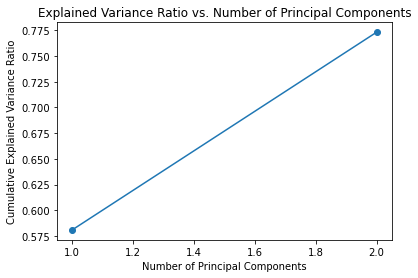

In [48]:
# Plot Explained Variance Ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

In [49]:
import seaborn as sns
from sklearn.cluster import KMeans

In [50]:
kmeans = KMeans(n_clusters=4)

In [51]:
kmeans.fit(modified)

KMeans(n_clusters=4)

In [52]:
labels = kmeans.labels_

In [53]:
print("Labels:")
print(labels)

Labels:
[0 1 1 ... 0 0 0]


In [54]:
centroids = kmeans.cluster_centers_

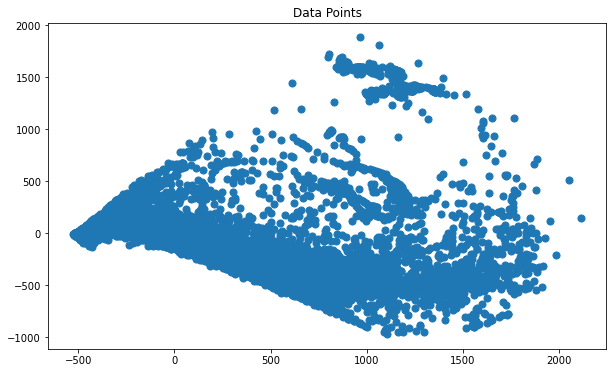

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(modified[:, 0], modified[:, 1], s=50)
plt.title("Data Points")
plt.show()

In [56]:
print(modified)

[[ -20.02493234  126.43378385]
 [1261.5265925  -426.73957149]
 [1480.71421029 -485.53576036]
 ...
 [-499.37710021  -37.35535234]
 [-496.96824095  -40.0995058 ]
 [-503.87591173  -31.1282928 ]]


In [57]:
modified_df = pd.DataFrame(modified, columns =['PCA1','PCA2']) 

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

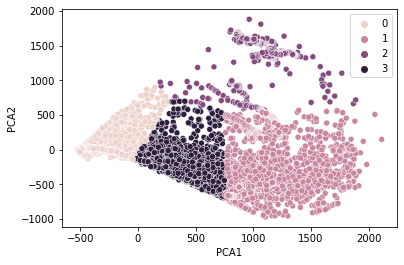

In [58]:
sns.scatterplot(data = modified_df, x = 'PCA1', y = 'PCA2', hue = kmeans.labels_)

In [59]:
print(type(labels))

<class 'numpy.ndarray'>


In [60]:
df = pd.DataFrame(labels, columns =['Activity']) 

In [61]:
print(df)

       Activity
0             0
1             1
2             1
3             1
4             1
...         ...
17300         0
17301         0
17302         0
17303         0
17304         0

[17305 rows x 1 columns]


In [62]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [63]:
print(type(modified_df))

<class 'pandas.core.frame.DataFrame'>


In [64]:
labelled_data = pd.concat([modified_df, df], axis=1)

In [65]:
labelled_data

,PCA1,PCA2,Activity
0,-20.024932,126.433784,0
1,1261.526592,-426.739571,1
2,1480.714210,-485.535760,1
3,1616.292432,-435.023467,1
4,1413.191758,-570.568929,1
...,...,...,...
17300,-510.173986,-23.889773,0
17301,-503.514945,-32.937757,0
17302,-499.377100,-37.355352,0
17303,-496.968241,-40.099506,0


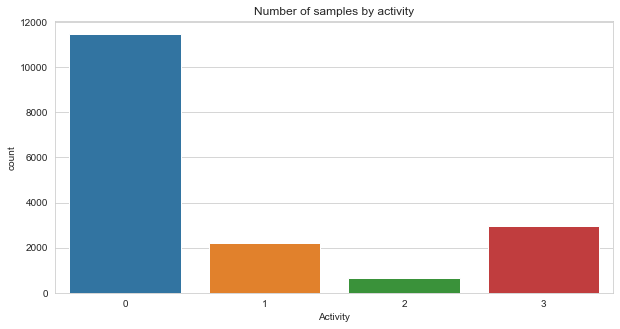

In [66]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Activity', data = labelled_data)
plt.title('Number of samples by activity')
plt.show()

In [67]:
#EDA-2

In [68]:
expariment = data[0:870000]
expariment

,timestamp,x,y,z
0,2015-06-12 13:30:00.161041,100,620,804
1,2015-06-12 13:30:00.260490,68,640,800
2,2015-06-12 13:30:00.359939,48,628,884
3,2015-06-12 13:30:00.459388,44,616,888
4,2015-06-12 13:30:00.558837,76,628,860
...,...,...,...,...
869995,2015-06-13 13:32:01.211933,536,788,440
869996,2015-06-13 13:32:01.311405,536,784,456
869997,2015-06-13 13:32:01.410877,532,788,452
869998,2015-06-13 13:32:01.510349,536,784,448


In [69]:
expariment['ts'] = expariment.loc[:, 'timestamp']
expariment

<ipython-input-69-71004bea1089>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expariment['ts'] = expariment.loc[:, 'timestamp']


,timestamp,x,y,z,ts
0,2015-06-12 13:30:00.161041,100,620,804,2015-06-12 13:30:00.161041
1,2015-06-12 13:30:00.260490,68,640,800,2015-06-12 13:30:00.260490
2,2015-06-12 13:30:00.359939,48,628,884,2015-06-12 13:30:00.359939
3,2015-06-12 13:30:00.459388,44,616,888,2015-06-12 13:30:00.459388
4,2015-06-12 13:30:00.558837,76,628,860,2015-06-12 13:30:00.558837
...,...,...,...,...,...
869995,2015-06-13 13:32:01.211933,536,788,440,2015-06-13 13:32:01.211933
869996,2015-06-13 13:32:01.311405,536,784,456,2015-06-13 13:32:01.311405
869997,2015-06-13 13:32:01.410877,532,788,452,2015-06-13 13:32:01.410877
869998,2015-06-13 13:32:01.510349,536,784,448,2015-06-13 13:32:01.510349


In [70]:
expariment = expariment.resample('5s', on='timestamp').agg({'x':'mean', 'y':'mean','z':'mean','ts':'max'})
expariment

,x,y,z,ts
timestamp,,,,
2015-06-12 13:30:00,87.673469,605.142857,848.326531,2015-06-12 13:30:04.934593
2015-06-12 13:30:05,-636.480000,420.640000,664.160000,2015-06-12 13:30:09.907043
2015-06-12 13:30:10,-747.607843,375.137255,607.137255,2015-06-12 13:30:14.978942
2015-06-12 13:30:15,-791.920000,308.800000,590.480000,2015-06-12 13:30:19.951392
2015-06-12 13:30:20,-740.160000,432.400000,569.600000,2015-06-12 13:30:24.923842
...,...,...,...,...
2015-06-13 13:31:40,526.980392,803.215686,428.078431,2015-06-13 13:31:44.997997
2015-06-13 13:31:45,538.800000,794.400000,426.400000,2015-06-13 13:31:49.971597
2015-06-13 13:31:50,546.160000,784.960000,439.440000,2015-06-13 13:31:54.945197


In [71]:
expariment = expariment.reset_index(drop=True)

In [72]:
expariment

,x,y,z,ts
0,87.673469,605.142857,848.326531,2015-06-12 13:30:04.934593
1,-636.480000,420.640000,664.160000,2015-06-12 13:30:09.907043
2,-747.607843,375.137255,607.137255,2015-06-12 13:30:14.978942
3,-791.920000,308.800000,590.480000,2015-06-12 13:30:19.951392
4,-740.160000,432.400000,569.600000,2015-06-12 13:30:24.923842
...,...,...,...,...
17300,526.980392,803.215686,428.078431,2015-06-13 13:31:44.997997
17301,538.800000,794.400000,426.400000,2015-06-13 13:31:49.971597
17302,546.160000,784.960000,439.440000,2015-06-13 13:31:54.945197
17303,550.000000,777.280000,448.400000,2015-06-13 13:31:59.918797


In [73]:
expo_data = pd.concat([expariment, df], axis=1)
expo_data

,x,y,z,ts,Activity
0,87.673469,605.142857,848.326531,2015-06-12 13:30:04.934593,0
1,-636.480000,420.640000,664.160000,2015-06-12 13:30:09.907043,1
2,-747.607843,375.137255,607.137255,2015-06-12 13:30:14.978942,1
3,-791.920000,308.800000,590.480000,2015-06-12 13:30:19.951392,1
4,-740.160000,432.400000,569.600000,2015-06-12 13:30:24.923842,1
...,...,...,...,...,...
17300,526.980392,803.215686,428.078431,2015-06-13 13:31:44.997997,0
17301,538.800000,794.400000,426.400000,2015-06-13 13:31:49.971597,0
17302,546.160000,784.960000,439.440000,2015-06-13 13:31:54.945197,0
17303,550.000000,777.280000,448.400000,2015-06-13 13:31:59.918797,0


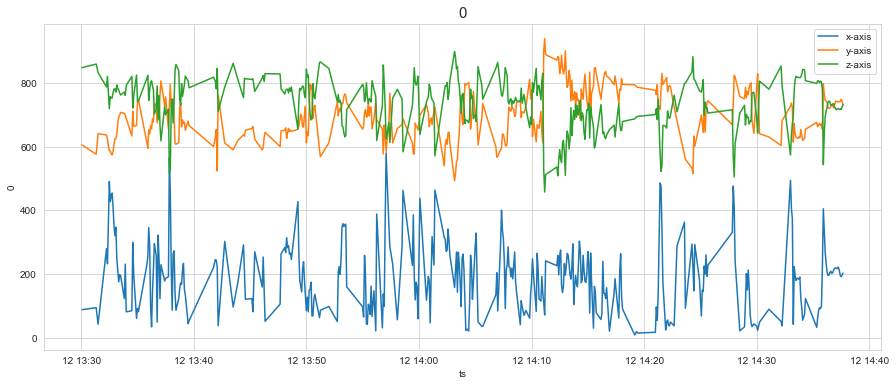

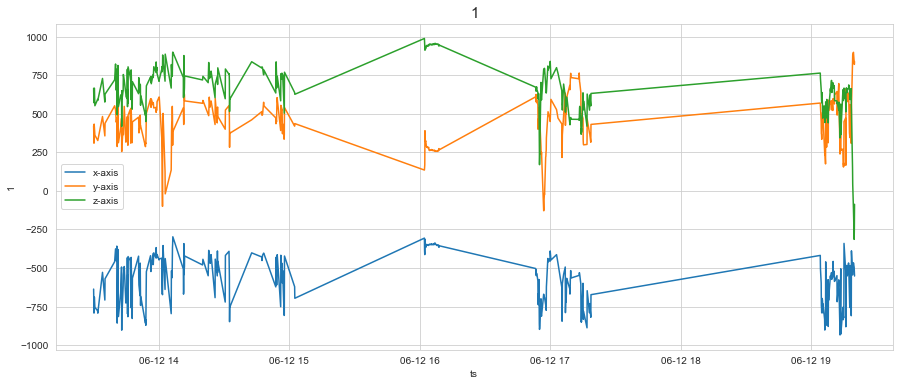

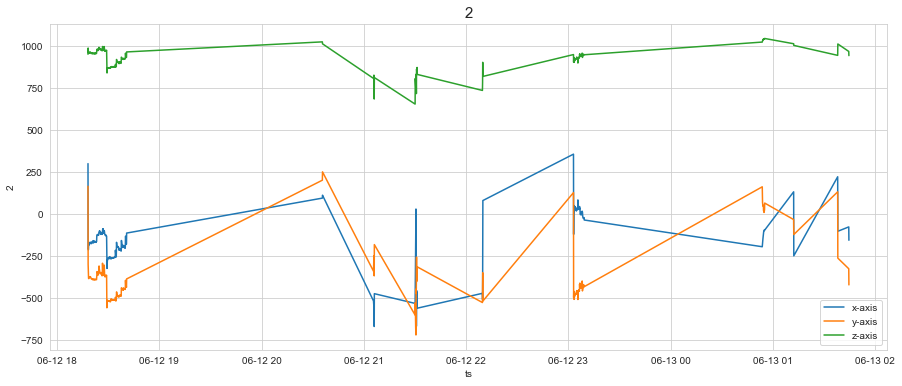

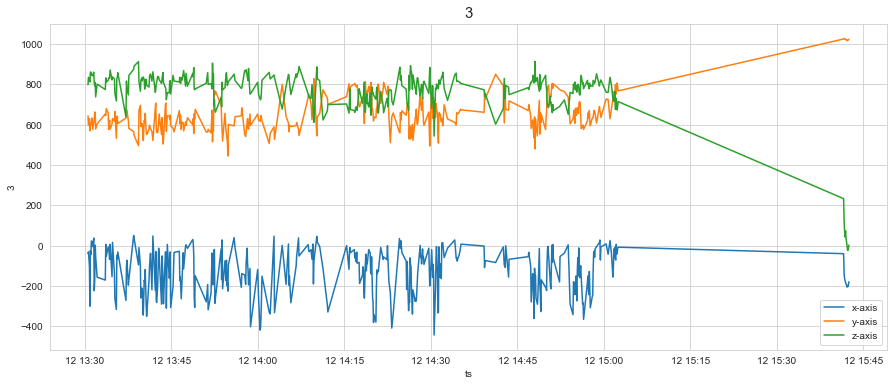

In [74]:
for i in [0,1,2,3]:
    
    data_new = expo_data[(expo_data['Activity'] == i)][:400]
    plt.figure(figsize = (15, 6))
    sns.lineplot(y = 'x', x = 'ts', data = data_new)
    sns.lineplot(y = 'y', x = 'ts', data = data_new)
    sns.lineplot(y = 'z', x = 'ts', data = data_new)
    plt.legend(['x-axis', 'y-axis', 'z-axis'])
    plt.ylabel(i)
    plt.title(i, fontsize = 15)
    plt.show()

In [77]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

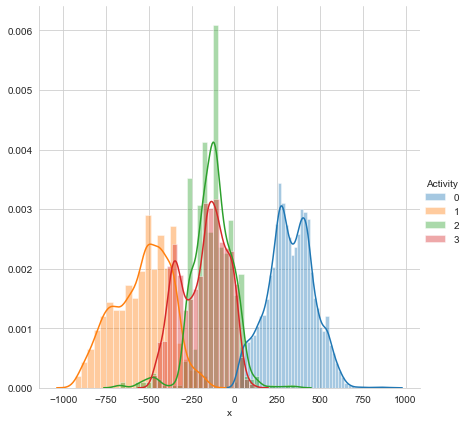

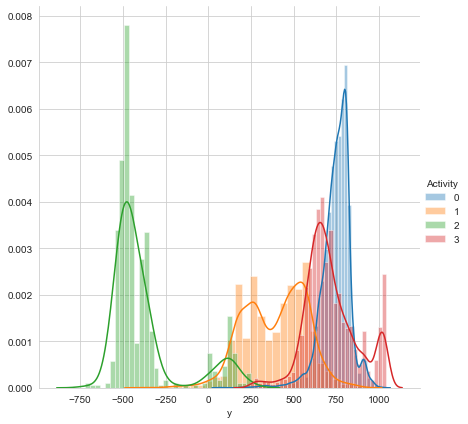

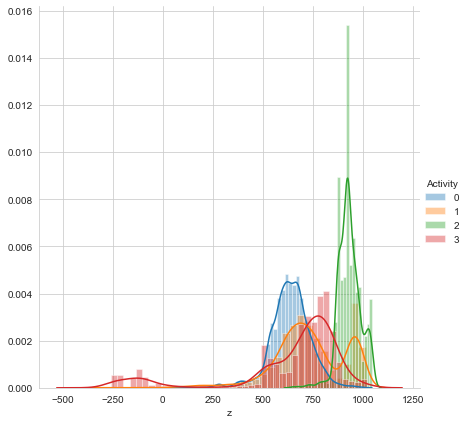

In [78]:
sns.FacetGrid(expo_data, hue = 'Activity', height = 6).map(sns.distplot, 'x').add_legend()
sns.FacetGrid(expo_data, hue = 'Activity', height = 6).map(sns.distplot, 'y').add_legend()
sns.FacetGrid(expo_data, hue = 'Activity', height = 6).map(sns.distplot, 'z').add_legend()

In [79]:
'''
0- rumination
1- lying
2- moving
3- standing
'''

'\n0- rumination\n1- lying\n2- moving\n3- standing\n'

In [80]:
#create a dataframe with all training data except the target column
X = labelled_data.drop(columns=["Activity"])
#check that the target variable has been removed
X.head()

,PCA1,PCA2
0,-20.024932,126.433784
1,1261.526592,-426.739571
2,1480.714210,-485.535760
3,1616.292432,-435.023467
4,1413.191758,-570.568929


In [81]:
#separate target values
y = labelled_data["Activity"].values
#view target values
y[0:5]

array([0, 1, 1, 1, 1])

In [82]:
#Splitting into train and test dataset
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [83]:
#Building and Training the model
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [84]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([0, 0, 0, 0, 0])

In [85]:
y_pred_init = knn.predict(X_test)

In [86]:
knn.score(X_test,y_test)

0.9991331984975441

In [87]:
#k-Fold Cross-Validation
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scoresmean:{}".format(np.mean(cv_scores)))

[0.99747201 0.99530516 0.99638859 0.99747201 0.99674855]
cv_scoresmean:0.9966772660566929


In [88]:
#Hypertuning model parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(3, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24])})

In [89]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 7}

In [90]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9969663094917512

In [91]:
#Building and Training the model_final using GridSearch parameters
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn_gscv_test = KNeighborsClassifier(n_neighbors = 11)
# Fit the classifier to the data
knn_gscv_test.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [92]:
knn_gscv_test.score(X_train, y_train)

0.9979774631609362

In [93]:
#show  predictions on the test data
y_pred_gscv = knn_gscv_test.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred_gscv)

0.9979774631609362

In [94]:
#Hypertuning model parameters using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
knn_rscv = RandomizedSearchCV(knn2, param_grid, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)
knn_rscv.fit(X_train, y_train)
knn_rscv.best_params_

C:\Users\subha\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 22 is smaller than n_iter=100. Running 22 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_neighbors': 7}

In [95]:
knn_rscv.best_score_

0.9969663094917512

In [96]:
from sklearn.model_selection import validation_curve
# Create range of values for parameter
param_range = np.arange(3, 25)
train_scores, test_scores = validation_curve(KNeighborsClassifier(), 
                                             X_train, 
                                             y_train, 
                                             param_name="n_neighbors", 
                                             param_range=param_range,
                                             cv=5, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

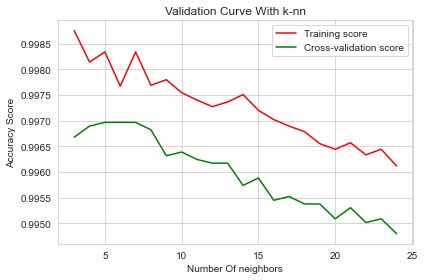

In [97]:
import matplotlib.pyplot as plt
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.plot(param_range, test_mean, label="Cross-validation score", color="green")

# Plot accurancy bands for training and test sets
#plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With k-nn")
plt.xlabel("Number Of neighbors")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")

Confusion matrix, without normalization
[[2290    0    5    0]
 [   0  129    2    1]
 [   1    0  589    1]
 [   0    1    0  442]]


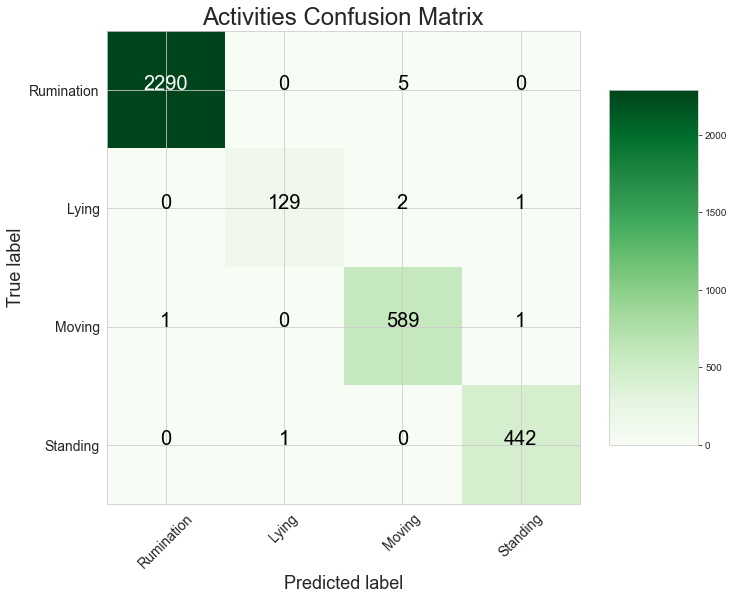

In [140]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

cm = confusion_matrix(y_test, y_pred_gscv)
plot_confusion_matrix(cm, classes = ['Rumination', 'Lying','Moving','Standing'],
                      title = 'Activities Confusion Matrix')

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_gscv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2296
           1       0.99      1.00      1.00       442
           2       1.00      0.98      0.99       132
           3       0.99      1.00      1.00       591

    accuracy                           1.00      3461
   macro avg       1.00      0.99      0.99      3461
weighted avg       1.00      1.00      1.00      3461



In [99]:
import warnings
warnings.filterwarnings('ignore')

In [100]:
#Logistic Regression

In [101]:
# Load libraries
from sklearn import linear_model
# Create logistic regression
logistic = linear_model.LogisticRegression(C=7,penalty='l2')
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)


In [102]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [103]:
# Fit grid search
best_model = clf.fit(X_train, y_train)

In [104]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 7.742636826811269


In [105]:
best_model.best_score_

0.9932823560601791

In [106]:
y_pred_lr = best_model.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred_lr)

0.9950881248194163

Confusion matrix, without normalization
[[2296    0    0    0]
 [   0  438    3    1]
 [   1    6  125    0]
 [   0    5    1  585]]


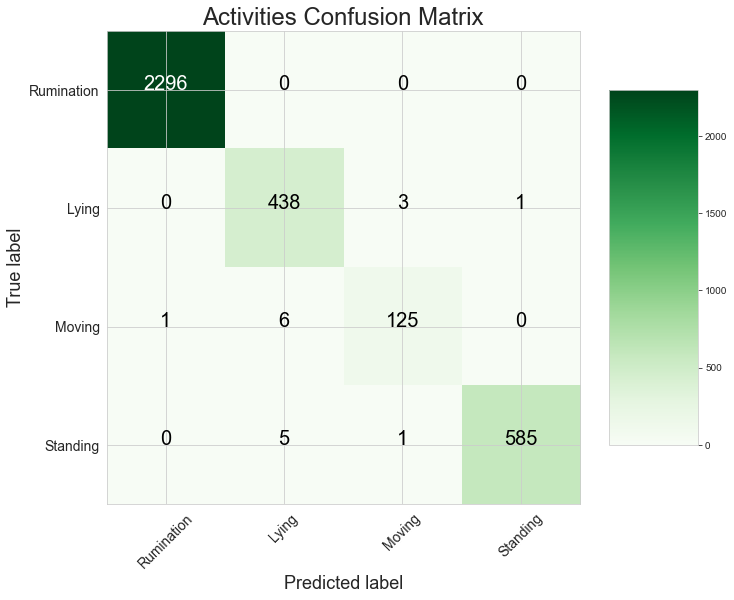

In [108]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

cm = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cm, classes = ['Rumination', 'Lying','Moving','Standing'],
                      title = 'Activities Confusion Matrix')

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2296
           1       0.98      0.99      0.98       442
           2       0.97      0.95      0.96       132
           3       1.00      0.99      0.99       591

    accuracy                           1.00      3461
   macro avg       0.99      0.98      0.98      3461
weighted avg       1.00      1.00      1.00      3461



In [110]:
#Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 1)
modelF = forest.fit(X_train, y_train)
y_predF = modelF.predict(X_test)

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_predF)

0.999711066165848

In [113]:
from sklearn.model_selection import GridSearchCV
#Using grid search
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


In [114]:
bestF.best_params_

{'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [115]:
from sklearn.ensemble import RandomForestClassifier
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 8, n_estimators = 500, min_samples_split = 5, min_samples_leaf = 1)
modelOpt = forestOpt.fit(X_train, y_train)
y_predrfc = modelOpt.predict(X_test)

In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_predrfc)

0.9994221323316961

In [117]:
#Hypertuning model parameters using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
rfc_rscv = RandomizedSearchCV(forest, hyperF, n_iter=100, cv=5, verbose=0, n_jobs=-1)
rfc_rscv.fit(X_train, y_train)
rfc_rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 25}

In [118]:
rfc_rscv.best_score_

0.9979053027219192

In [119]:
forestOptRS = RandomForestClassifier(random_state = 1, max_depth = 15, n_estimators = 1200, min_samples_split = 2, min_samples_leaf = 2)
modelOptRS = forestOpt.fit(X_train, y_train)
y_predrfcRS = modelOpt.predict(X_test)

In [120]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_predrfcRS)

0.9994221323316961

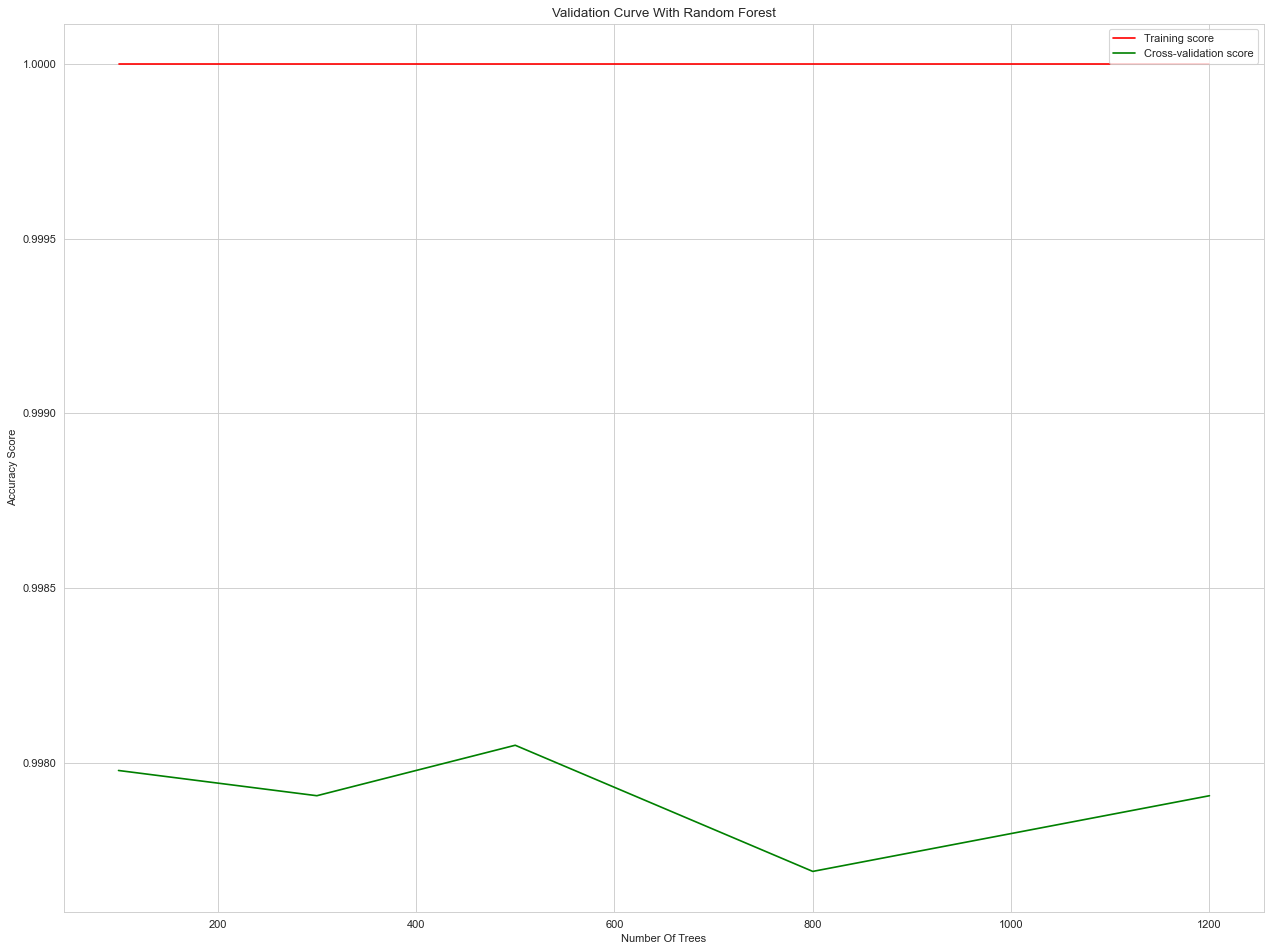

In [121]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
# Create range of values for parameter
param_range = [100, 300, 500, 800, 1200]

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X_train, 
                                             y_train, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.plot(param_range, test_mean, label="Cross-validation score", color="green")

# Plot accurancy bands for training and test sets
#plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")

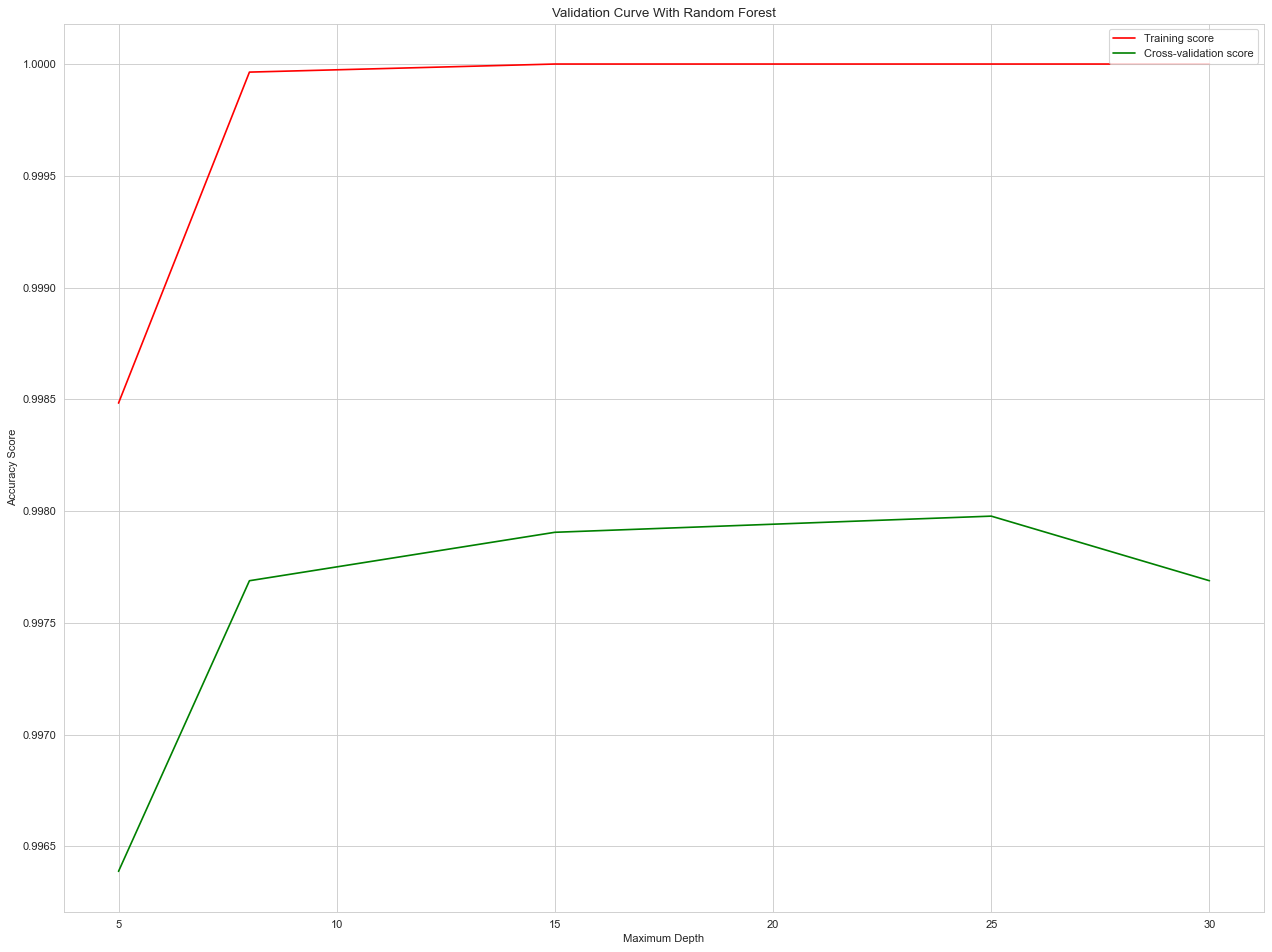

In [122]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
param_range = [5, 8, 15, 25, 30]

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X_train, 
                                             y_train, 
                                             param_name="max_depth", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.plot(param_range, test_mean, label="Cross-validation score", color="green")

# Plot accurancy bands for training and test sets
#plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")

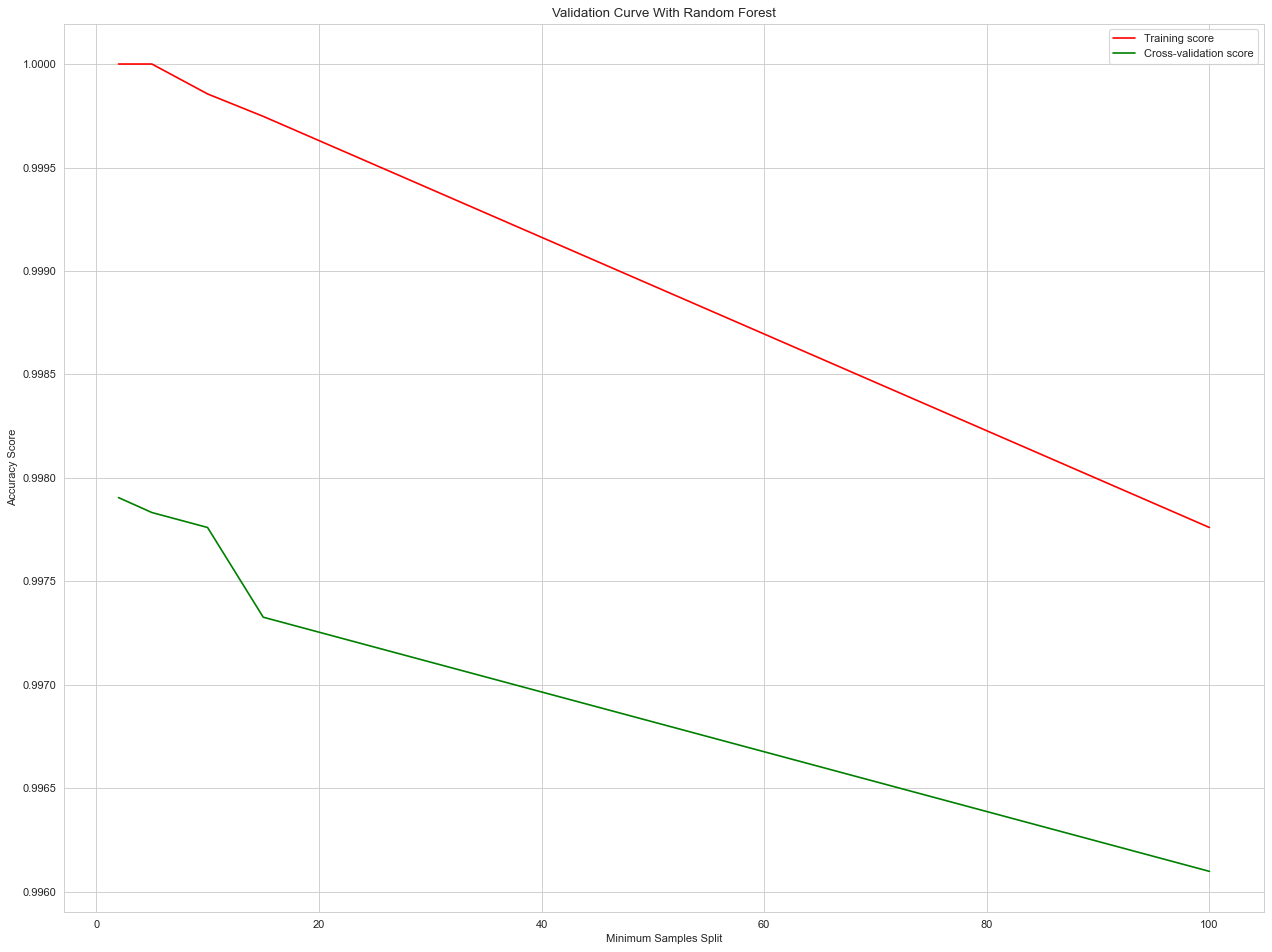

In [123]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
param_range = [2, 5, 10, 15, 100]

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X_train, 
                                             y_train, 
                                             param_name="min_samples_split", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.plot(param_range, test_mean, label="Cross-validation score", color="green")

# Plot accurancy bands for training and test sets
#plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Minimum Samples Split")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")

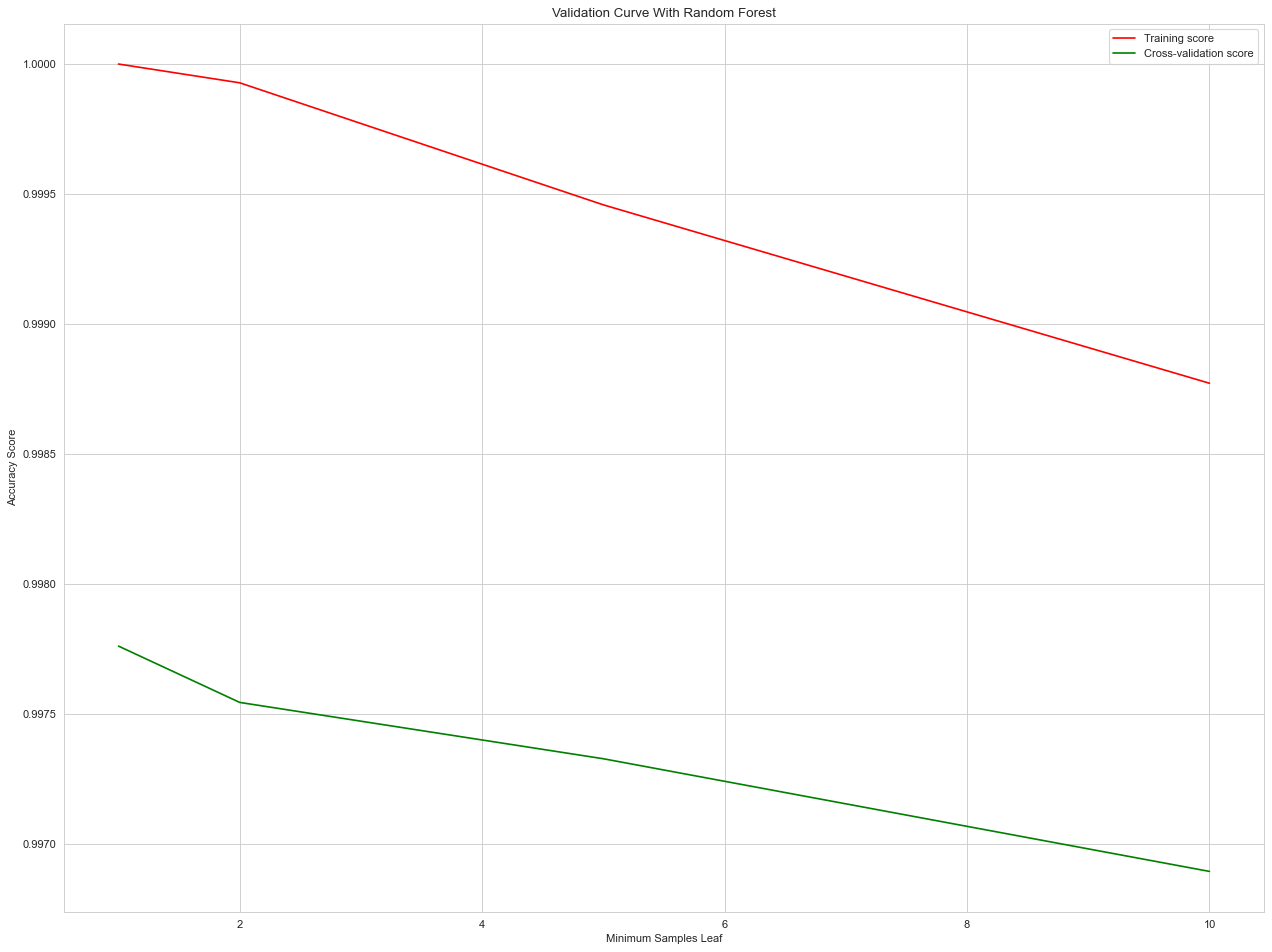

In [124]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
param_range = [1, 2, 5, 10]

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X_train, 
                                             y_train, 
                                             param_name="min_samples_leaf", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.plot(param_range, test_mean, label="Cross-validation score", color="green")

# Plot accurancy bands for training and test sets
#plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Minimum Samples Leaf")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")

Confusion matrix, without normalization
[[2295    0    0    1]
 [   0  442    0    0]
 [   0    0  132    0]
 [   0    0    0  591]]


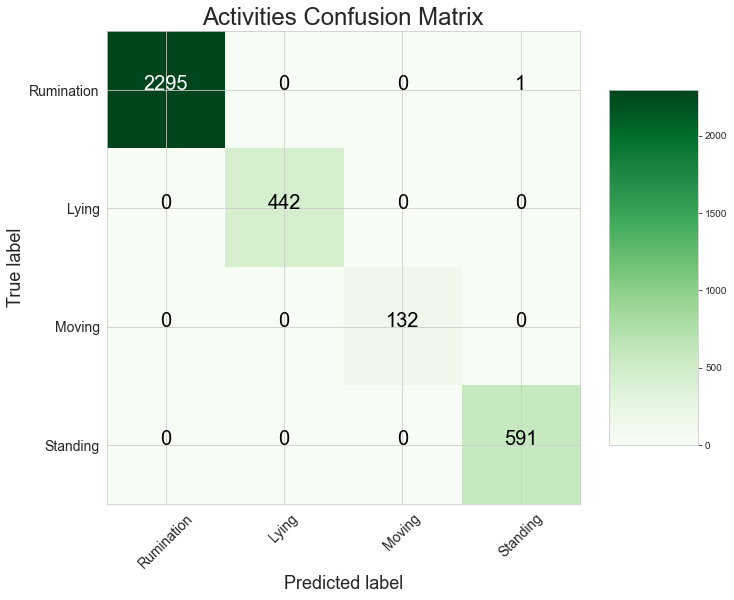

In [125]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

cm = confusion_matrix(y_test, y_predF)
plot_confusion_matrix(cm, classes = ['Rumination', 'Lying','Moving','Standing'],
                      title = 'Activities Confusion Matrix')

In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2296
           1       1.00      1.00      1.00       442
           2       1.00      1.00      1.00       132
           3       1.00      1.00      1.00       591

    accuracy                           1.00      3461
   macro avg       1.00      1.00      1.00      3461
weighted avg       1.00      1.00      1.00      3461

